### 4b. Pipeline Dependency We use a modular design on all of our data analysis tasks. To get to a final product, we organize steps using a data pipeline. One task may require the output of one or multiple other tasks to run successfully. This creates dependencies between tasks.

We also require the pipeline to be flexible. This means a new task may enter a running pipeline anytime that may not satisfy the tasks' dependencies. In this event, we may have a set of tasks already running or completed in the pipeline, and we will need to map out which tasks are prerequisites for the newest task so the pipeline can execute them in the correct order. For optimal pipeline execution, when we map out the necessary tasks required to execute the new task, we want to avoid scheduling tasks that have already been executed.

If we treat each task as a node and the dependencies between a pair of tasks as directed edges, we can construct a DAG (Wiki: Directed Acyclic Graph).

Consider the following scenario. At a certain stage of our data processing, we have a set of tasks (starting tasks) that we know all its prerequisite tasks have been executed, and we wish to reach a later goal task. We need to map out a path that indicates the order of executions on tasks that finally leads to the goal task. We are looking for a solution that satisfies both necessity and sufficiency -- if a task is not a prerequisite task of goal, or its task is a prerequisite task for starting tasks (already been executed), then it shouldn't be included in the path. The path needs to follow a correct topological ordering of the DAG, hence a task needs to be placed behind all its necessary prerequisite tasks in the path.

Note: A starting task should be included in the path, if and only if it's a prerequisite of the goal task

For example, we have 6 tasks [A, B, C, D, E, F], C depends on A (denoted as A->C), B->C, C->E, E->F. A new job has at least 2 tasks and at most 6 tasks, each task can only appear once.

Examples:

Inputs: starting task: A, goal task: F, output: A,B,C,E,F or B,A,C,E,F. Input: starting task: A,C, goal task:'F', outputs: C,E,F. You will find the starting task and the goal task in question.txt file, a list of all tasks in task_ids.txt, and dependencies in relations.txt.

### Answer
- I tried a wide range of different processes to accomplish this, and eventually alighted upon using reverse depth first search traversal. 
- Basically we want to look from the end input backwards, to identify the connections to each node (the dependencies) as we move from the goal to the beginning task / node.

- This was a tough problem as there weren't many inbuilt Pythonic options for approaching a problem like this compared with Java.

- I fooled around with building classes of my own, but eventually found something that works way better than my code - Networkx

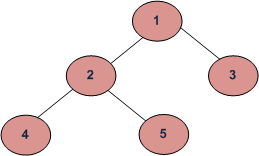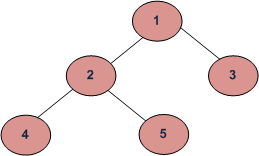

In [126]:
# Python program to for tree traversals
  
# A class that represents an individual node in a
# Binary Tree
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key
  
  
# A function to do inorder tree traversal
def printInorder(root):
  
    if root:
  
        # First recur on left child
        printInorder(root.left)
  
        # then print the data of node
        print(root.val),
  
        # now recur on right child
        printInorder(root.right)
          

            
def printPreorder(root):
  
    if root:
  
        # First print the data of node
        print(root.val),
  
        # Then recur on left child
        printPreorder(root.left)
  
        # Finally recur on right child
        printPreorder(root.right)
        
  
          
# A function to do postorder tree traversal
def printPostorder(root):
  
    if root:
  
        # First recur on left child
        printPostorder(root.left)
  
        # the recur on right child
        printPostorder(root.right)
  
        # now print the data of node
        print(root.val),
  
  
# Driver code
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
  
print("\nPostorder traversal of binary tree is")
printPostorder(root)
print("Preorder traversal of binary tree is")
printPreorder(root)
  
print("\nInorder traversal of binary tree is")
printInorder(root)


Postorder traversal of binary tree is
4
5
2
3
1
Preorder traversal of binary tree is
1
2
4
5
3

Inorder traversal of binary tree is
4
2
5
1
3


This calculates the nodes we need to travel to to reach the end, as well as their respective dependent nodes.

The downside to this is building the tree, as you have to write the left / right branches as you go down, a laborious process.

# Networkx
Instead, there's a simple implementation for this through a package called Networkx that is both fast and can efficiently scale, as well as having the benefit of being incredibly straightforward to read, visualize, alter, and recalculate as needed.

We instantiate a directed acyclical graph, and add our edges to it. If this were a regular occurence, we could standardize this with some preprocessing, but just for this one off, we can load them ourselves

#### Networkx will automatically calculate the nodes and their connections from this.

In [127]:
import networkx as nx
graph = nx.DiGraph()
graph.add_edges_from([("73", "20"), ("20", "94"), ("20", "97"), ("94", "56"), ("94", "102"), ("97", "102"), ("102","36"), ("102", "37"), ("102", "31"),("56", '102'), ('56', '75'), ('56', '55'),
                     ('75', '31'), ('75', '37'), ('55','31'), ('55', '37'), ('100', '20'),('16', '37'), ('39', '73'), ('39', '100'), ('41', '73'), ('41', '112'), ('62', '55'), ('112', '97'), ('21', '20')])

graph.nodes()

NodeView(('73', '20', '94', '97', '56', '102', '36', '37', '31', '75', '55', '100', '16', '39', '41', '112', '62', '21'))

A visualization of the nodes of the DAG

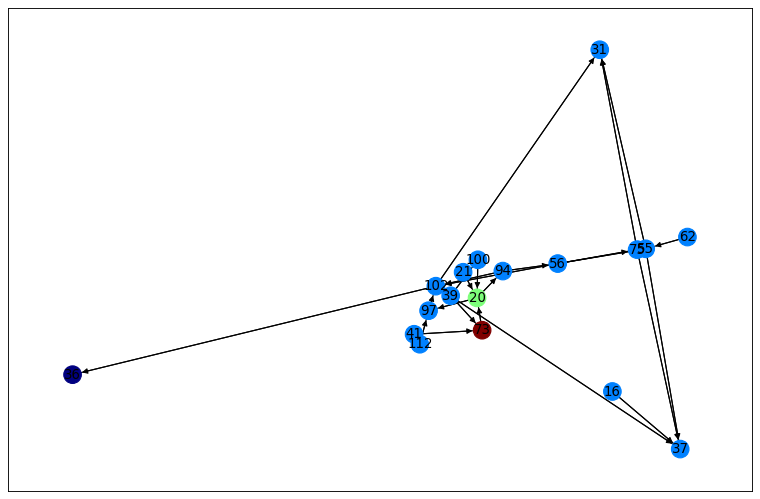

In [128]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)

val_map = {'73': 1.0,
           '20': 0.5,
           '36': 0.0}

values = [val_map.get(node, 0.25) for node in graph.nodes()]

# Specify the edges you want here

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 250)
nx.draw_networkx_labels(graph, pos)
nx.draw_networkx_edges(graph, pos, edge_color='blacK', arrows=True)
nx.draw_networkx_edges(graph, pos, arrows=False)
plt.show()

That doesn't really tell us much, so let's take a look at the dependencies within the tree, after choosing an end goal

Inputting our goal task will generate a new node network indicating all task dependencies to complete the final task, as well as the step at which they need to be completed:

Input End Node 36


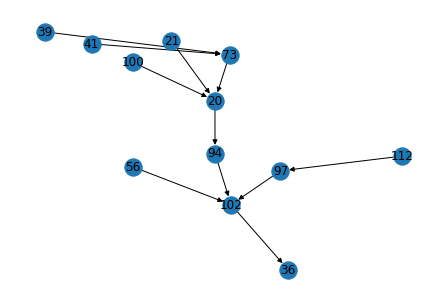

In [130]:
goal_task = nx.dfs_tree(graph.reverse(), source=input('Input End Node')).reverse()
nx.draw(goal_task, with_labels = True)

In [131]:
goal_task.nodes

NodeView(('36', '102', '94', '20', '73', '39', '41', '100', '21', '97', '112', '56'))

### In this case, we have some prior dependencies that need to be completed prior to starting node 73.
### However, these dependencies are needed elsewhere in the network, so we need to be careful about what we can and can't ignore

Input Start Node 73


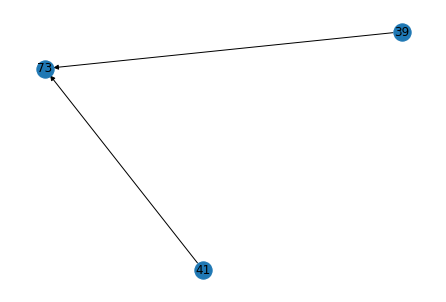

In [132]:
start_task = nx.dfs_tree(graph.reverse(), source=input('Input Start Node')).reverse()
nx.draw(start_task, with_labels = True)

### We'll produce a function called "task scheduler" that will do exactly that:
We can first grab the previous connections from the starting task.

From there, we can use Networkx out_edges to find their connections.

Using these, we check if each of those connections have two connections - one to the starting point, or maybe one later in the work flow.

If the connections prior to the starting point only have one connection (i.e. to the starting point itself), we can then safely remove those, as we can assume that they've already been completed in the DAG.

In [34]:
# First construct some test data that to see if it will identify and remove the previous nodes:

import networkx as nx
test = nx.DiGraph()
test.add_edges_from([('22', '73'), # our starting node now has a dependent node that connects to nowhere else along the goal path
                     ('73', '1'),  # as well as a node that connects nowhere else in the grid, and therefore isn't a dependencies for the final goal
                     ('2', '22'), 
                     ('2', '3'),# And finally, a connection to the previous dependency, that is still prior to our starting point
                     ("73", "20"), ("20", "94"), ("20", "97"), ("94", "56"), ("94", "102"), ("97", "102"), ("102","36"), ("102", "37"), ("102", "31"),("56", '102'), ('56', '75'), ('56', '55'),
                     ('75', '31'), ('75', '37'), ('55','31'), ('55', '37'), ('100', '20'),('16', '37'), ('39', '73'), ('39', '100'), ('41', '73'), ('41', '112'), ('62', '55'), ('112', '97'), ('21', '20')])

In [118]:
def task_scheduler(goal, start, graph):
    goal_tasktest = nx.dfs_tree(graph.reverse(), source=goal).reverse()
    start_tasktest = nx.dfs_tree(graph.reverse(), source=start).reverse()
    lst = list(start_tasktest)
    con = []
    for i in lst[1:len(lst)+1]:
        con += list(test.out_edges(i))
    d = {}
    for x, y in con:
        d[x] = d.get(x, 0) + 1
    
    def getKeysByValue(dictOfElements, valueToFind):
        listOfKeys = list()
        listOfItems = dictOfElements.items()
        for item  in listOfItems:
            if item[1] == valueToFind:
                listOfKeys.append(item[0])
        return  listOfKeys
    
    node_drop = getKeysByValue(d, 1)
    for i in node_drop:
        goal_tasktest.remove_node(i)
    nx.draw(goal_tasktest, with_labels = True)   


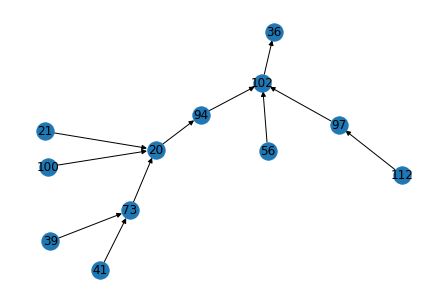

In [122]:
task_scheduler('36','73',test)

### As we can see, this produces the same graph as the original dataset, while allowing for edge cases.

In [124]:
import networkx as nx
graph = nx.DiGraph()
graph.add_edges_from([("73", "20"), ("20", "94"), ("20", "97"), ("94", "56"), ("94", "102"), ("97", "102"), ("102","36"), ("102", "37"), ("102", "31"),("56", '102'), ('56', '75'), ('56', '55'),
                     ('75', '31'), ('75', '37'), ('55','31'), ('55', '37'), ('100', '20'),('16', '37'), ('39', '73'), ('39', '100'), ('41', '73'), ('41', '112'), ('62', '55'), ('112', '97'), ('21', '20')])

graph.nodes()

NodeView(('73', '20', '94', '97', '56', '102', '36', '37', '31', '75', '55', '100', '16', '39', '41', '112', '62', '21'))

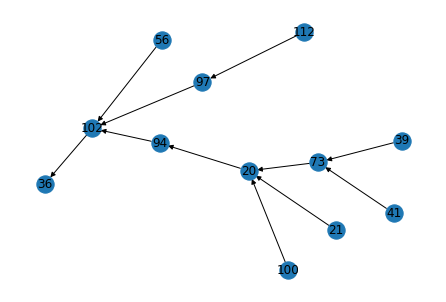

In [125]:
task_scheduler('36','73',graph)